# K-Means Clustering

Import libraries

In [20]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

Prepare Dataset

In [21]:
url = "https://raw.githubusercontent.com/sztoma-dev/K-Means-Assignment/refs/heads/main/data.csv"
data = np.loadtxt(urllib.request.urlopen(url), delimiter=",")

Define methods

In [22]:
def manual_kmeans(data, k, max_iters=100):
    np.random.seed(42)
    centroids = data[np.random.choice(len(data), k, replace=False)]
    for _ in range(max_iters):
        # Compute distances to all centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)
        # Compute new centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def visualize_clusters(data, labels, centroids, k):
    plt.figure(figsize=(6, 5))
    colors = plt.cm.tab10.colors
    for i in range(k):
        cluster_points = data[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    s=10, color=colors[i % len(colors)], label=f"Cluster {i+1}")
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', marker='x', s=100, label='Centroids')
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

Code runner

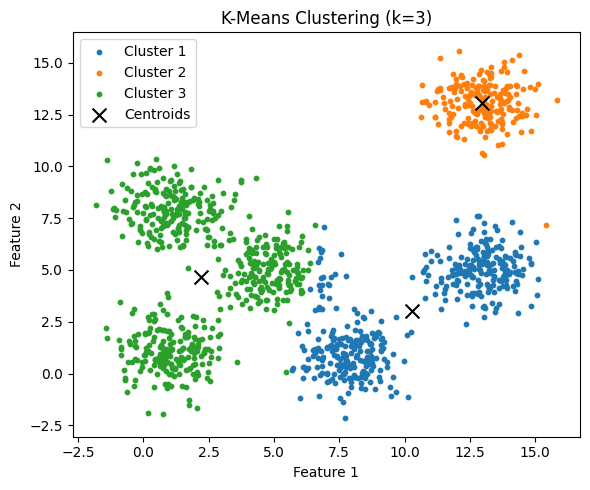

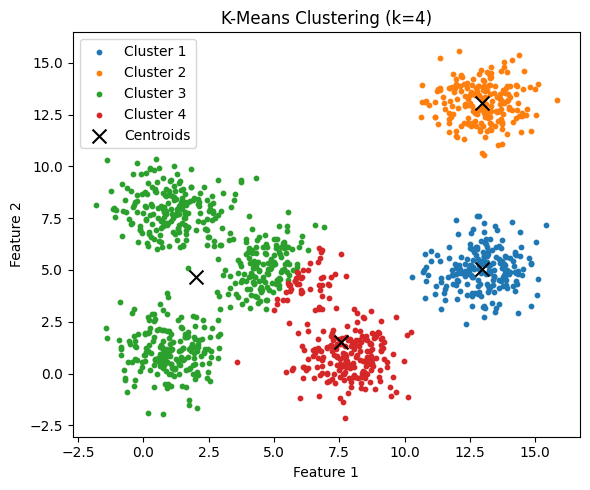

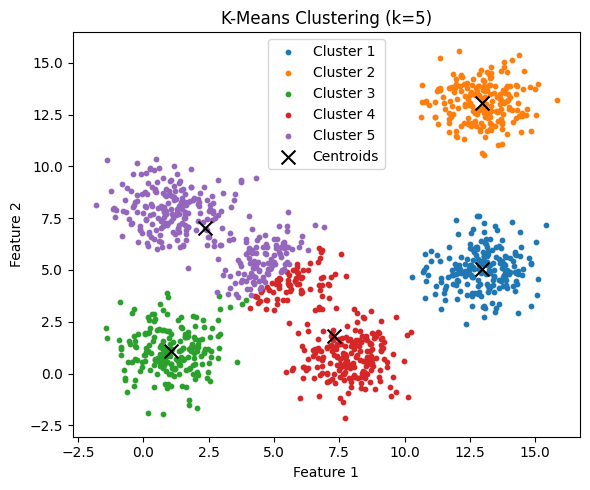

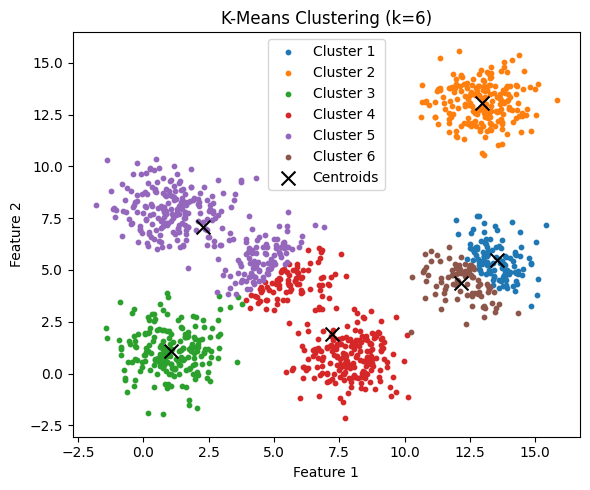

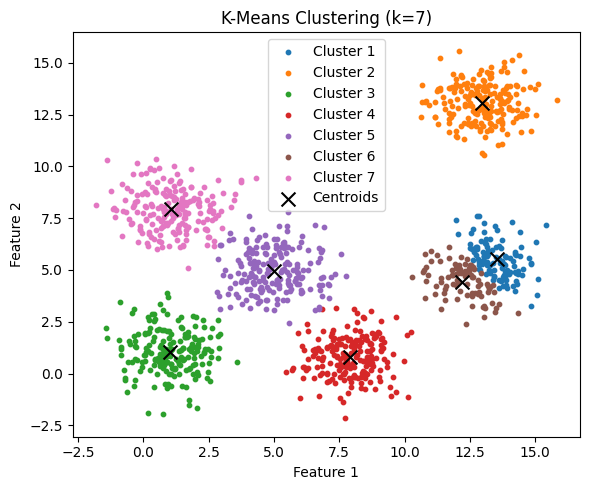

In [19]:
for k in [3, 4, 5, 6, 7]:
    labels, centroids = manual_kmeans(data, k)
    visualize_clusters(data, labels, centroids, k)